# Utiliser Pandas : Enquête sur la science ouverte

Reproduction

Mariannig Le Béchec - Aline Bouchard - Philippe Charrier - Claire Denecker - Gabriel Gallezot - Stéphanie Rennes

- Rapport : https://hal.archives-ouvertes.fr/hal-03545512v1
- Données : https://zenodo.org/record/5827206


In [1]:
import pandas as pd

## Charger les données

### Directement en ligne

In [3]:
url = "https://zenodo.org/record/5827206/files/SOSP_Export_base%20de%20donn%C3%A9es%20diffusable.csv"
data = pd.read_csv(url)

### Après téléchargement

In [6]:
data= pd.read_csv("../../../../../../Téléchargements/SOSP_Export_base de données diffusable.csv")

On a les données brutes

- Nettoyage et transformation des données
- Exploration des données (statistiques)
- Finalisation

## Nettoyage et la transformation

In [11]:
data.shape

(1089, 131)

Une variable : le sexe

Connaitre les modalités d'une colonne

In [20]:
data["sexe"].unique()

array(['un homme', 'une femme', 'je ne souhaite pas répondre'],
      dtype=object)

Est-ce qu'il y a des valeurs manquantes ?

In [21]:
data["sexe"].isna().sum() # Vrai = 1 ; Faux = 0 et on somme les réponses

0

Distribution (valeur absolue)

In [25]:
data["sexe"].value_counts()/len(data)

sexe
un homme                       0.518825
une femme                      0.440771
je ne souhaite pas répondre    0.040404
Name: count, dtype: float64

In [29]:
data["sexe"].value_counts(normalize=True)

sexe
un homme                       0.518825
une femme                      0.440771
je ne souhaite pas répondre    0.040404
Name: proportion, dtype: float64

Prennons une variable numérique : l'année de leur première publicatoin

In [31]:
data["annee_premiere_publi"].isna().sum()

0

In [32]:
data["annee_premiere_publi"].mean()

2004.030303030303

In [34]:
data["annee_premiere_publi"].std()

11.362671081996828

In [35]:
data["annee_premiere_publi"].describe()

count    1089.000000
mean     2004.030303
std        11.362671
min      1968.000000
25%      1996.000000
50%      2005.000000
75%      2014.000000
max      2020.000000
Name: annee_premiere_publi, dtype: float64

In [37]:
(2023 - data["annee_premiere_publi"]).mean()

18.96969696969697

Si maintenant on voulait si les gens sont plus ou moins jeunes par rapport à la moyenne

In [41]:
data["annee_premiere_publi"] - data["annee_premiere_publi"].mean()

0       -9.030303
1        0.969697
2        1.969697
3      -15.030303
4       10.969697
          ...    
1084    -0.030303
1085   -17.030303
1086   -12.030303
1087   -22.030303
1088     6.969697
Name: annee_premiere_publi, Length: 1089, dtype: float64

Visualisation plus ou moins rapide

<AxesSubplot:title={'center':'Distribution des genres'}, ylabel='sexe'>

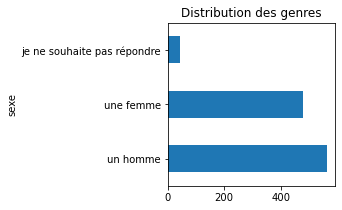

In [47]:
data["sexe"].value_counts().plot(kind="barh",
                                 title="Distribution des genres",
                                 figsize=(3,3))

Pour sauvegarder, on charge matplotlib

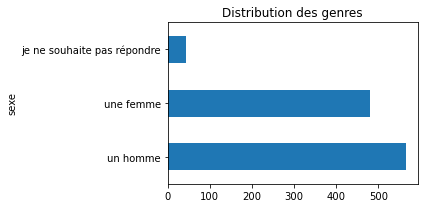

In [52]:
import matplotlib.pyplot as plt #bibliothèque de manipulation des graphiques

# on fait le graphique
data["sexe"].value_counts().plot(kind="barh",
                                 title="Distribution des genres",
                                 figsize=(6,3))

# on met en forme et on sauvegarde
plt.tight_layout()
plt.savefig("graphique.png")

### Pandas fonctionne comme une base de données

On peut sélectionner des éléments sur des conditions

In [56]:
filtre = data["annee_premiere_publi"] > 2015

In [58]:
data[filtre].shape

(238, 131)

On peut utiliser des conditions pour sélectionner des sous ensemble du tableau

In [63]:
data[(data["annee_premiere_publi"] > 2015) & (data["sexe"] == "un homme")].shape

(122, 131)

### Transformer les données existantes

In [69]:
data["sexe_reco"] = data["sexe"].replace({"un homme":"homme",
                      "une femme":"femme",
                     "je ne souhaite pas répondre":"na"})

Une méthode générique pour appliquer des opératoins sur chaque cellule / ligne

In [71]:
def recodage(code):
    if code  == "un homme":
        return "Homme"
    if code == "une femme":
        return "Femme"
    if code == "je ne souhaite pas répondre":
        return "NA"
    return "Problème"

In [73]:
data["sexe_reco"] = data["sexe"].apply(recodage)

Un autre exemple de méthode : les chaines de caractères

In [78]:
data["Systeme_exploitation"].str.contains("Windows").sum()

696

## Un exemple de traitement un peu plus avancé

Colonnes plein texte qui contiennent des réponses

In [83]:
colonnes = ["logiciel_production_donnees","outils_nettoyage",
           "Outils_analyses","Outils_visualisation"]

Une fonction qui agrège les réponses par ligne et  vérifie si le mot clé python est dedans

In [85]:
def is_python(ligne):
    contenu = ""
    for variable in colonnes:
        contenu = contenu + str(ligne[variable])
    contenu = contenu.lower()
    return "python" in contenu

In [92]:
data["utilise python"] = data.apply(is_python,axis=1)

En une ligne

In [89]:
data[colonnes].apply(lambda x : "python" in ";".join([str(i) for i in x]),axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
1084    False
1085    False
1086    False
1087    False
1088    False
Length: 1089, dtype: bool

## On peut faire des statistiques

In [94]:
data["utilise python"].value_counts()

utilise python
False    921
True     168
Name: count, dtype: int64

Aller plus loin

In [97]:
tableau = pd.crosstab(data["sexe"],data["utilise python"])

On va chercher un test statistique dans la bibliothèque Scipy

In [96]:
from scipy.stats import chi2_contingency

On l'applique

In [100]:
var = chi2_contingency(tableau)

In [106]:
var

Chi2ContingencyResult(statistic=2.827975195295611, pvalue=0.24317167644756862, dof=2, expected_freq=array([[ 37.21212121,   6.78787879],
       [477.83746556,  87.16253444],
       [405.95041322,  74.04958678]]))

In [105]:
var[1]

0.24317167644756862